In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
file_path = 'HANOI.csv'
data=pd.read_csv(file_path, delimiter=',',header=9,skipinitialspace=True)
data

,timestamp,Temperature,Precipitation,Wind Speed,Wind Direction
0,20200607T0000,29.137028,0.0,8.466324,167.27565
1,20200607T0100,28.957027,0.0,8.986805,168.02386
2,20200607T0200,28.787027,0.0,9.682458,172.09283
3,20200607T0300,28.677027,0.0,10.137212,176.98721
4,20200607T0400,28.487026,0.0,10.389601,180.00000
...,...,...,...,...,...
187,20200614T1900,27.757027,0.0,8.339639,153.43495
188,20200614T2000,27.997026,0.2,7.757685,164.05460
189,20200614T2100,27.867027,1.4,7.501892,173.88449
190,20200614T2200,27.787027,1.4,7.212506,184.23639


In [3]:
temperature = np.array(data['Temperature'])
num_periods = 48
f_horizon = 1
x_data = temperature[:(len(temperature)-(num_periods*2))]
x_batches = x_data.reshape(-1, num_periods, 1)

y_data = temperature[1:(len(temperature)-(num_periods*2))+f_horizon]
y_batches = y_data.reshape(-1, num_periods, 1)
print(y_batches.shape)

(2, 48, 1)


In [4]:
def test_data(series, forecast, num):
    testX = temperature[-(num + forecast):][:num].reshape(-1, num_periods, 1)
    testY = temperature[-(num):].reshape(-1, num_periods, 1)
    return testX, testY
X_test, Y_test = test_data(temperature, f_horizon, 48*2)
print(X_test.shape)


(2, 48, 1)


In [5]:
tf.compat.v1.reset_default_graph()
inputs = 1
rnn_size = 100
output = 1
learning_rate=0.001
dropout_keep_prob = tf.compat.v1.placeholder(tf.float32)

X = tf.compat.v1.placeholder(tf.float32, [None, num_periods, 1])
Y = tf.compat.v1.placeholder(tf.float32, [None, num_periods, 1])

rnn_cells=tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=rnn_size, activation=tf.nn.relu6)
rnn_output, states = tf.compat.v1.nn.dynamic_rnn(rnn_cells, X, dtype=tf.float32)

output=tf.reshape(rnn_output, [-1, rnn_size])
logit=tf.compat.v1.layers.dense(output, 1, name="softmax")

outputs=tf.reshape(logit, [-1, num_periods, 1])
print(logit)

loss = tf.reduce_sum(input_tensor=tf.square(outputs - Y))

accuracy = tf.reduce_mean(input_tensor=tf.cast(tf.equal(tf.argmax(input=logit, axis=1), tf.cast(Y, tf.int64)), tf.float32))

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
train_step=optimizer.minimize(loss)

init=tf.compat.v1.global_variables_initializer()

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Tensor("softmax/BiasAdd:0", shape=(None, 1), dtype=float32)


In [6]:
epochs = 1000

sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)
saver = tf.compat.v1.train.Saver()

for epoch in range(epochs):
    train_dict = {X: x_batches, Y: y_batches, dropout_keep_prob:0.5}
    sess.run(train_step, feed_dict=train_dict)
y_pred=sess.run(outputs, feed_dict={X: X_test})
save_path = saver.save(sess, "models/HANOI.ckpt")


In [7]:
with tf.compat.v1.Session() as sess:
  # Restore variables from disk.
    saver = tf.compat.v1.train.Saver()
    saver.restore(sess, "models/HANOI.ckpt")
    y_pred=sess.run(outputs, feed_dict={X: X_test})
    print (y_pred)

INFO:tensorflow:Restoring parameters from models/HANOI.ckpt
[[[27.771275]
  [27.670301]
  [27.514309]
  [27.273485]
  [27.091272]
  [27.940718]
  [29.529057]
  [31.713366]
  [33.009945]
  [33.435574]
  [32.978546]
  [32.90413 ]
  [33.759697]
  [35.32327 ]
  [36.760773]
  [37.13226 ]
  [36.112576]
  [34.547417]
  [32.613297]
  [30.79645 ]
  [29.295267]
  [28.494045]
  [28.337486]
  [28.467005]
  [28.776361]
  [29.228468]
  [29.40157 ]
  [28.976603]
  [28.138334]
  [27.791817]
  [28.000145]
  [28.931753]
  [30.927458]
  [33.286446]
  [35.05543 ]
  [35.478867]
  [35.929733]
  [36.396408]
  [35.459885]
  [33.8047  ]
  [32.564926]
  [31.652925]
  [31.607544]
  [31.818014]
  [31.23622 ]
  [30.016035]
  [28.815205]
  [28.330448]]

 [[28.606035]
  [28.298018]
  [28.04582 ]
  [27.8724  ]
  [27.400864]
  [28.115808]
  [29.114805]
  [30.952202]
  [32.397057]
  [32.776085]
  [31.925314]
  [30.924593]
  [30.385828]
  [31.06962 ]
  [33.10997 ]
  [35.47553 ]
  [35.796295]
  [34.33717 ]
  [32.631676]


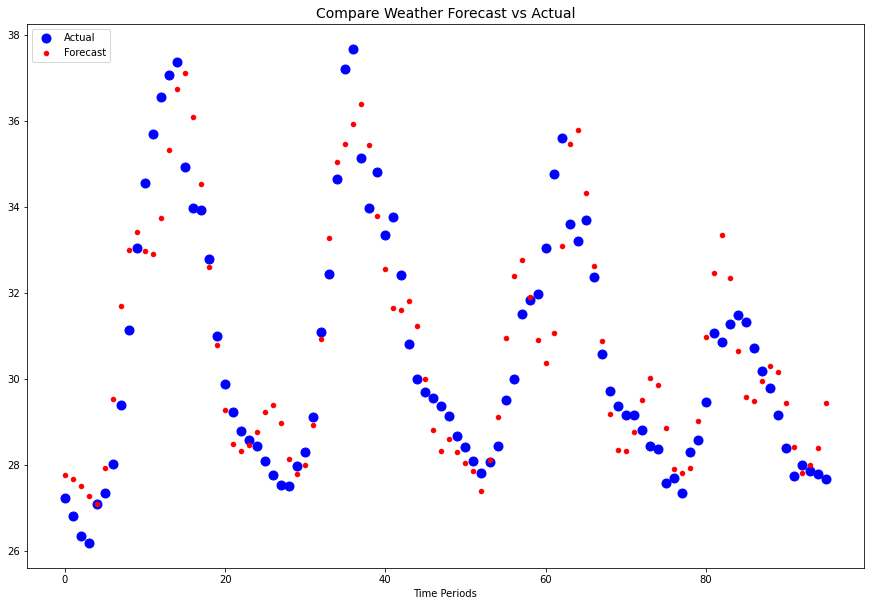

In [8]:
plt.figure(figsize=(15,10))
plt.title("Compare Weather Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)),"bo",  markersize=9, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)),"r.",  markersize=9, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.show()
